# UCI Adult Data Set

## 1. Exploration

In [1]:
import sys
print (sys.version)

import numpy as np
import pandas as pd
import keras as ke

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

sns.set()

3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
data_df = pd.read_csv('data/adult-data.csv', na_values='?')
print('Data read successfully!')

Data read successfully!


In [3]:
display(data_df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,ann_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
columns = list(data_df)
display(columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'country',
 'ann_salary']

In [5]:
n_people = len(data_df.index)
n_features = len(data_df.columns)-1
n_rich = len(data_df[data_df.ann_salary == '>50K'])
n_poor = len(data_df[data_df.ann_salary == '<=50K'])

n_female = len(data_df[data_df.sex == 'Female'])
n_male = len(data_df[data_df.sex == 'Male'])

print("Total number of people: {}".format(n_people))
print("Number of rich people: {}".format(n_rich))
print("Number of poor people: {}".format(n_poor))
print("Number of features: {}".format(n_features))

salary_by_sex = data_df.groupby(['sex', 'ann_salary']).count()['age']
display(salary_by_sex)

salary_by_race = data_df.groupby(['race', 'ann_salary']).count()['age']
display(salary_by_race)

Total number of people: 32561
Number of rich people: 7841
Number of poor people: 24720
Number of features: 14


sex     ann_salary
Female  <=50K          9592
        >50K           1179
Male    <=50K         15128
        >50K           6662
Name: age, dtype: int64

race                ann_salary
Amer-Indian-Eskimo  <=50K           275
                    >50K             36
Asian-Pac-Islander  <=50K           763
                    >50K            276
Black               <=50K          2737
                    >50K            387
Other               <=50K           246
                    >50K             25
White               <=50K         20699
                    >50K           7117
Name: age, dtype: int64

In [6]:
n_rich_women = salary_by_sex['Female', '>50K']
n_rich_men = salary_by_sex['Male', '>50K']

pos_female_frac = n_rich_women/n_female
pos_male_frac = n_rich_men/n_male

print("Proportion of females which are high paid = ", pos_female_frac)
print("Proportion of males which are high paid = ", pos_male_frac)

Proportion of females which are high paid =  0.10946058861758426
Proportion of males which are high paid =  0.3057365764111978


## 2. Preparing the Data

There are several non-numeric columns that need to be converted. Many of them are can be reasonably converted into `1`/`0` (binary) values.

Other columns are categorical variables with more than two values. We create as many columns as possible values and assign a `1` to one of them and `0` to all others. We  use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function for this transformation.

In [7]:
# Preprocess feature columns

def preprocess_data(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty
    # Check each column
    for col, col_data in X.iteritems():
        # If non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)
        outX = outX.join(col_data)  # collect column(s) in output dataframe
    return outX.fillna('Unknown')

data_df = preprocess_data(data_df)

display(data_df.head())
display(list(data_df))
display(data_df.sum()[:60])
display(data_df.sum()[60:])

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,...,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia,ann_salary_<=50K,ann_salary_>50K
0,39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,1,0,0,1,0
1,50,0,0,0,0,0,1,0,0,83311,...,0,0,0,0,0,1,0,0,1,0
2,38,0,0,0,1,0,0,0,0,215646,...,0,0,0,0,0,1,0,0,1,0
3,53,0,0,0,1,0,0,0,0,234721,...,0,0,0,0,0,1,0,0,1,0
4,28,0,0,0,1,0,0,0,0,338409,...,0,0,0,0,0,0,0,0,1,0


['age',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'fnlwgt',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'education_num',
 'marital_status_Divorced',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handl

age                                        1256257
workclass_Federal-gov                          960
workclass_Local-gov                           2093
workclass_Never-worked                           7
workclass_Private                            22696
workclass_Self-emp-inc                        1116
workclass_Self-emp-not-inc                    2541
workclass_State-gov                           1298
workclass_Without-pay                           14
fnlwgt                                  6179373392
education_10th                                 933
education_11th                                1175
education_12th                                 433
education_1st-4th                              168
education_5th-6th                              333
education_7th-8th                              646
education_9th                                  514
education_Assoc-acdm                          1067
education_Assoc-voc                           1382
education_Bachelors            

sex_Male                                 21790
capital_gain                          35089324
capital_loss                           2842700
hours_per_week                         1316684
country_Cambodia                            19
country_Canada                             121
country_China                               75
country_Columbia                            59
country_Cuba                                95
country_Dominican-Republic                  70
country_Ecuador                             28
country_El-Salvador                        106
country_England                             90
country_France                              29
country_Germany                            137
country_Greece                              29
country_Guatemala                           64
country_Haiti                               44
country_Holand-Netherlands                   1
country_Honduras                            13
country_Hong                                20
country_Hunga

### 2.1 Removing redundant data columns

Remove redundant data columns of our choice
- We note that preprocessing the non-numeric (categorical) data columns into binary data columns has resulted in a number of redundant data columns which are entirely dependent on other columns
- This means that 9 of the 107 columns can be deleted without any loss of data
- For the non-numeric binary columns we can remove any one of the two binary columns created
- For the multiclass columns, we remove the binary column which is least popular

In [8]:
# Remove redundant data columns:
# 1. For the non-numeric binary columns we can remove any one of the two binary columns created

del data_df['sex_Female']
del data_df['ann_salary_<=50K']

# Remove redundant data columns:
# 2. For the multiclass columns, we remove the binary column which is least popular

del data_df['workclass_Never-worked']
del data_df['education_Preschool']
del data_df['marital_status_Married-AF-spouse']
del data_df['occupation_Armed-Forces']
del data_df['relationship_Other-relative']
del data_df['race_Other']
del data_df['country_South'] # Not least popular but not a country!

sex_Male                             1.000000
relationship_Husband                 0.580135
marital_status_Married-civ-spouse    0.431805
relationship_Unmarried              -0.321273
relationship_Wife                   -0.319311
occupation_Adm-clerical             -0.263148
hours_per_week                       0.229309
marital_status_Divorced             -0.228621
occupation_Craft-repair              0.223128
ann_salary_>50K                      0.215980
marital_status_Widowed              -0.188487
marital_status_Never-married        -0.171434
relationship_Not-in-family          -0.168879
occupation_Other-service            -0.153677
occupation_Transport-moving          0.132468
race_Black                          -0.115604
marital_status_Separated            -0.109135
workclass_Self-emp-not-inc           0.107451
race_White                           0.103486
relationship_Own-child              -0.102369
occupation_Farming-fishing           0.100097
occupation_Handlers-cleaners      

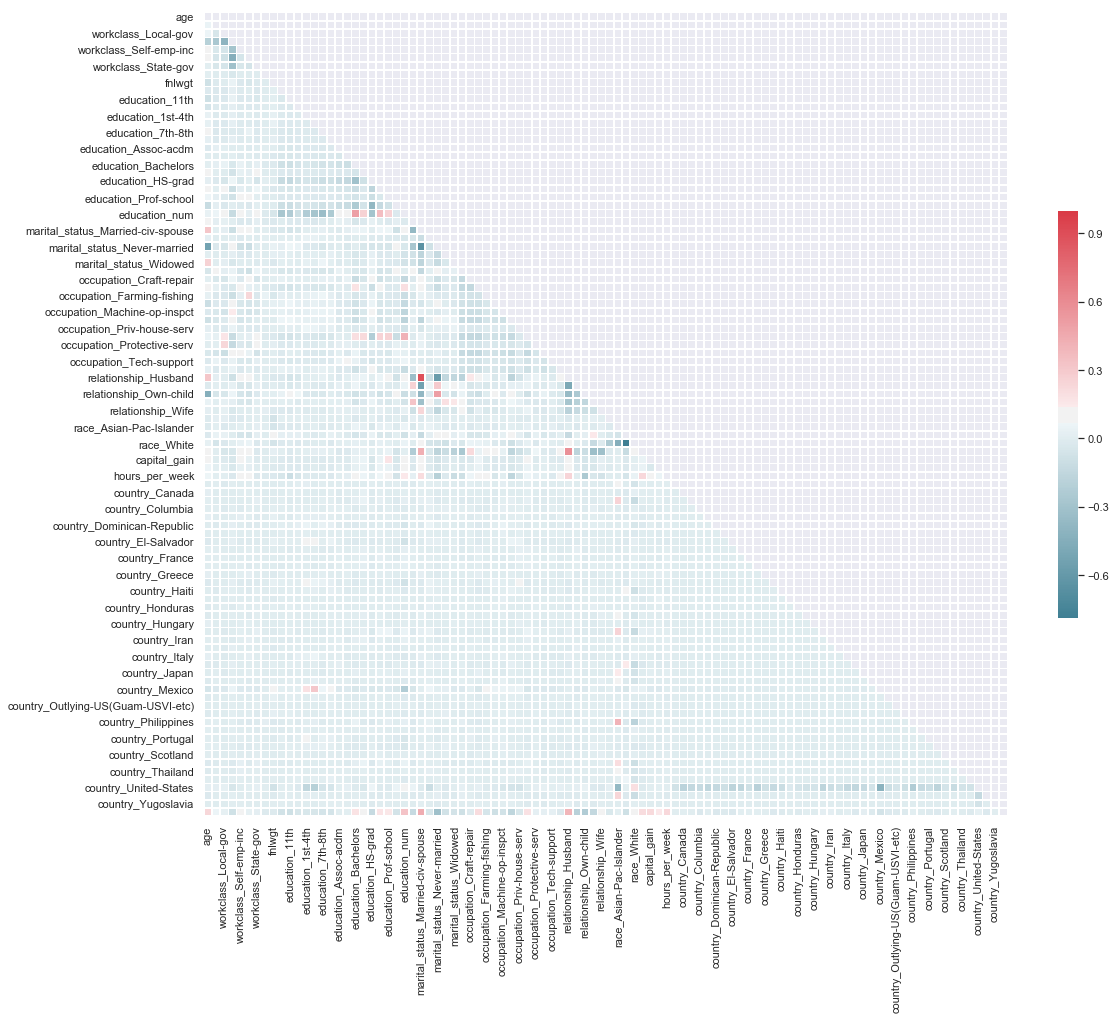

In [9]:
#Look at the correlation in the data

corr_df = data_df.corr()
sex_corrs = corr_df.reindex(corr_df.sex_Male.abs().sort_values(ascending=False).index)['sex_Male']
display(sex_corrs.iloc[:28])

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
savefig('figures/CorrelationHeatMap.png')

### 2.2 Separate features and labels

In [10]:
# Extract feature (X) and target (y) columns

feature_cols = list(data_df.columns[:-1])  # all columns but last are features
target_col = data_df.columns[-1]  # last column is the target/label
gender_col = 'sex_Male'

print("Number feature columns (", len(feature_cols),"):")
print("Target column: ",target_col)

X_all = data_df[feature_cols]  # feature values for all students
y_all = data_df[target_col]  # corresponding targets/labels
z_all = data_df[gender_col]

display(X_all.head())
display(y_all.head())
display(z_all.head())

Number feature columns ( 97 ):
Target column:  ann_salary_>50K


,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,education_10th,...,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,1,0,0,0,0,215646,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,1,0,0,0,0,234721,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,1,0,0,0,0,338409,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    0
2    0
3    0
4    0
Name: ann_salary_>50K, dtype: uint8

0    1
1    1
2    1
3    1
4    0
Name: sex_Male, dtype: uint8

### 2.3 Splitting data into training and test sets

In [11]:
#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def make_training_and_test_sets(X, y, z, num_train):
    num_all = X.shape[0]  # same as len(student_data)
    num_test = num_all - num_train

    test_frac = float(num_test)/float(num_all)

    X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=test_frac, stratify=y, random_state=0)
    X_train2, X_train1, y_train2, y_train1 = train_test_split(X_train, y_train, test_size=0.333333, stratify=y_train, random_state=0)
    
    X_train = X_train.reset_index(drop=True)
    X_train2 = X_train2.reset_index(drop=True)
    X_train1 = X_train1.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_train2 = y_train2.reset_index(drop=True)
    y_train1 = y_train1.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    z_train = z_train.reset_index(drop=True)
    z_test = z_test.reset_index(drop=True)
    
    return X_train, X_train2, X_train1, X_test, y_train, y_train2, y_train1, y_test, z_train, z_test.reset_index(drop=True)

def normalise(X_train,  X_train2,  X_train1,  X_test):
    scaler = StandardScaler().fit(X_train) # scale based on X_train
    scale_func = lambda df, scaler: pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
    X_train  = scale_func(X_train,  scaler)
    X_test   = scale_func(X_test,   scaler)
    X_train2 = scale_func(X_train2, scaler)
    X_train1 = scale_func(X_train1, scaler)
    return X_train, X_train2, X_train1, X_test

In [12]:
# Training with the original dataset
n_train = 30000
X_train, X_train2, X_train1, X_test, y_train, y_train2, y_train1, y_test, z_train, z_test = make_training_and_test_sets(X_all, y_all, z_all, n_train)
X_train, X_train2, X_train1, X_test = normalise(X_train,  X_train2,  X_train1,  X_test)

display(X_train.head())

print("Training set: {} samples".format(X_train.shape[0]))
print("Test set: {} samples".format(X_test.shape[0]))

# Calculate some stats on out training set so we can augment
n_female = X_train[z_train==0].shape[0]
n_male = X_train[z_train==1].shape[0]

i_high_paid_female = X_train.index[np.logical_and(z_train==0, y_train==1)].tolist()
i_high_paid_male = X_train.index[np.logical_and(z_train==1, y_train==1)].tolist()

n_rich_women = len(i_high_paid_female)
n_rich_men = len(i_high_paid_male)

rich_female_frac = n_rich_women/n_female
rich_male_frac = n_rich_men/n_male

print("Proportion of females which are high paid = ", rich_female_frac)
print("Proportion of males which are high paid = ", rich_male_frac)

# Augment the training set by oversampling rich women
frac, integer = math.modf(rich_male_frac / rich_female_frac)
n_frac = int(frac*n_rich_women)
i_frac = np.random.choice(i_high_paid_female, n_frac)
print(frac, integer, n_frac)

X_new = X_train.copy()
y_new = y_train.copy()
z_new = z_train.copy()
for i in range(int(integer)):
    X_new = pd.concat([X_new, X_train.loc[i_high_paid_female]], ignore_index=True)
    y_new = pd.concat([y_new, y_train.loc[i_high_paid_female]], ignore_index=True)
    z_new = pd.concat([z_new, z_train.loc[i_high_paid_female]], ignore_index=True)
X_new = pd.concat([X_new, X_train.loc[i_frac]], ignore_index=True)
y_new = pd.concat([y_new, y_train.loc[i_frac]], ignore_index=True)
z_new = pd.concat([z_new, z_train.loc[i_frac]], ignore_index=True)

# Check we have the right number of data points in our augmented training set
print('Should have ',n_train+integer*n_rich_women+n_frac,' data points:', X_new.shape[0])

# Work out how many data point we need to train from our augmented dataset
new_n_train = X_new.shape[0]*n_train/X_all.shape[0]
new_n_train = int(new_n_train - new_n_train%3)
print('number of training points in augmented dataset: ', new_n_train)

X_train_new, X_train2_new, X_train1_new, X_test_new, y_train_new, y_train2_new, y_train1_new, y_test_new, z_train_new, z_test_new = make_training_and_test_sets(X_new, y_new, z_new, new_n_train)

print("Training set: {} samples".format(X_train_new.shape[0]))
print("Test set: {} samples".format(X_test_new.shape[0]))


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,education_10th,...,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0.545140,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,1.691593,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
1,-1.581287,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,-1.303320,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
2,-0.114786,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,0.003586,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
3,-1.581287,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,-1.298146,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
4,-0.261436,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,0.098630,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231


Training set: 30000 samples
Test set: 2561 samples
Proportion of females which are high paid =  0.10888799517393927
Proportion of males which are high paid =  0.3062231973671088
0.8122769353769752 2.0 879
Should have  33045.0  data points: 33045
number of training points in augmented dataset:  30444
Training set: 30444 samples
Test set: 2601 samples


## 3 Training a 3 layer neural network...

In [13]:
results_df = pd.DataFrame(
    data = [[0.] * 3] * 12,
    index=['Training time'    ,
           'Prediction time',
           'F1 score (train)' ,
           'Precision (train)',
           'Recall (train)'   ,
           'Accuracy (train)' ,
           'ROC AUC (train)'  ,
           'F1 score (test)',
           'Precision (test)',
           'Recall (test)',
           'Accuracy (test)',
           'ROC AUC (test)'],
    columns=[int(n_train/3), int(2*n_train/3), int(n_train)])
display(results_df)

,10000,20000,30000
Training time,0.0,0.0,0.0
Prediction time,0.0,0.0,0.0
F1 score (train),0.0,0.0,0.0
Precision (train),0.0,0.0,0.0
Recall (train),0.0,0.0,0.0
Accuracy (train),0.0,0.0,0.0
ROC AUC (train),0.0,0.0,0.0
F1 score (test),0.0,0.0,0.0
Precision (test),0.0,0.0,0.0
Recall (test),0.0,0.0,0.0


In [14]:
import time

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### Train a model
def train_classifierNN(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train.values, y_train.values, epochs=20, verbose=0)
    end = time.time()
    return end-start
    
### Predict on training set and compute F1 score
def predict_labelsNN(clf, X, y):
    start = time.time()
    y_pred = pd.Series(clf.predict(X).ravel(), index=y.index)
    end = time.time()
    return y_pred, end-start

### Train and predict using different training set sizes
def train_predictNN(clf, X_train, y_train, X_test, y_test):
    results_df.at['Training time', len(y_train)] = train_classifierNN(clf, X_train, y_train)
    y_pred, t_pred = predict_labelsNN(clf, X_train, y_train)
    results_df.at['F1 score (train)' , len(y_train)] = f1_score(y_train.values, y_pred>0.5)
    results_df.at['Precision (train)', len(y_train)] = precision_score(y_train.values, y_pred>0.5)
    results_df.at['Recall (train)'   , len(y_train)] = recall_score(y_train.values, y_pred>0.5)
    results_df.at['Accuracy (train)' , len(y_train)] = accuracy_score(y_train.values, y_pred>0.5)
    results_df.at['ROC AUC (train)'  , len(y_train)] = roc_auc_score(y_train.values, y_pred)
    y_pred, t_pred = predict_labelsNN(clf, X_test, y_test)
    results_df.at['F1 score (test)' , len(y_train)] = f1_score(y_test.values, y_pred>0.5)
    results_df.at['Precision (test)', len(y_train)] = precision_score(y_test.values, y_pred>0.5)
    results_df.at['Recall (test)'   , len(y_train)] = recall_score(y_test.values, y_pred>0.5)
    results_df.at['Accuracy (test)' , len(y_train)] = accuracy_score(y_test.values, y_pred>0.5)
    results_df.at['ROC AUC (test)'  , len(y_train)] = roc_auc_score(y_test.values, y_pred)
    results_df.at['Prediction time' , len(y_train)] = t_pred
    return y_pred

In [15]:
import keras as ke
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def nn_classifier(n_features):
    inputs = Input(shape=(n_features,))
    dense1 = Dense(32, activation='relu')(inputs)
    dropout1 = Dropout(0.2)(dense1)
    dense2 = Dense(32, activation='relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)
    dense3 = Dense(32, activation="relu")(dropout2)
    dropout3 = Dropout(0.2)(dense3)
    outputs = Dense(1, activation='sigmoid')(dropout3)
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

### 3.1 On all the data

In [16]:
# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predictNN(clf_nn, X_train1, y_train1, X_test, y_test)
y_pred = train_predictNN(clf_nn, X_train2, y_train2, X_test, y_test)
y_pred = train_predictNN(clf_nn, X_train, y_train, X_test, y_test)

display(results_df)

,10000,20000,30000
Training time,22.879120,41.383435,61.673839
Prediction time,0.044276,0.040957,0.040389
F1 score (train),0.714384,0.727848,0.703434
Precision (train),0.801239,0.798611,0.808779
Recall (train),0.644518,0.668605,0.622370
Accuracy (train),0.875900,0.879600,0.873633
ROC AUC (train),0.933497,0.934925,0.932921
F1 score (test),0.664323,0.675934,0.655914
Precision (test),0.725528,0.728464,0.733467
Recall (test),0.612642,0.630470,0.593193


0    0.827725
1    0.646975
2    0.254966
3    0.537486
4    0.122200
dtype: float32

0    1
1    1
2    1
3    1
4    1
Name: sex_Male, dtype: uint8

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,fnlwgt,education_10th,...,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,-0.261436,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,-0.027250,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
1,0.325165,-0.174347,3.823201,-1.519201,-0.189126,-0.290049,-0.202881,-0.021608,-0.327468,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
2,-0.481411,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,0.349699,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
3,0.765115,-0.174347,-0.261561,-1.519201,-0.189126,-0.290049,4.929007,-0.021608,-0.138260,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231
4,-0.261436,-0.174347,-0.261561,0.658241,-0.189126,-0.290049,-0.202881,-0.021608,-0.122682,-0.171175,...,-0.04363,-0.034176,-0.060108,-0.01826,-0.039188,-0.024502,-0.025174,0.341423,-0.044391,-0.0231


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


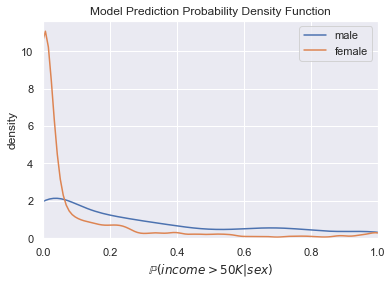

In [17]:
display(y_pred.head(), z_test.head())
display(X_test.head())

sns.set()
ax = sns.distplot(y_pred[z_test==1], hist=False, label='male')
ax = sns.distplot(y_pred[z_test==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
fig = ax.get_figure()
fig.savefig("figures/all-data-dist.png")

### 3.2 With gender information removed

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


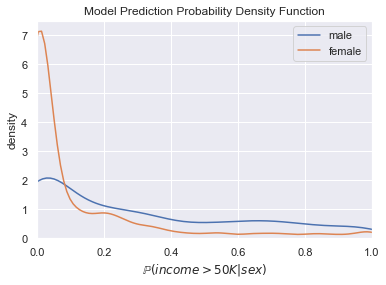

In [18]:
clf_nn = nn_classifier(n_features=X_train[X_train.columns.difference(['sex_Male'])].shape[1])
y_pred = train_predictNN(clf_nn, X_train[X_train.columns.difference(['sex_Male'])], y_train, X_test[X_test.columns.difference(['sex_Male'])], y_test)

ax = sns.distplot(y_pred[z_test==1], hist=False, label='male')
ax = sns.distplot(y_pred[z_test==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
fig = ax.get_figure()
fig.savefig("figures/no-sex-data-dist.png")

### 3.3 Training after upsampling well paid women

In [19]:
results_df = pd.DataFrame(
    data = [[0.] * 3] * 12,
    index=['Training time'    ,
           'Prediction time',
           'F1 score (train)' ,
           'Precision (train)',
           'Recall (train)'   ,
           'Accuracy (train)' ,
           'ROC AUC (train)'  ,
           'F1 score (test)',
           'Precision (test)',
           'Recall (test)',
           'Accuracy (test)',
           'ROC AUC (test)'],
    columns=[int(new_n_train/3), int(2*new_n_train/3), int(new_n_train)])
display(results_df)

,10148,20296,30444
Training time,0.0,0.0,0.0
Prediction time,0.0,0.0,0.0
F1 score (train),0.0,0.0,0.0
Precision (train),0.0,0.0,0.0
Recall (train),0.0,0.0,0.0
Accuracy (train),0.0,0.0,0.0
ROC AUC (train),0.0,0.0,0.0
F1 score (test),0.0,0.0,0.0
Precision (test),0.0,0.0,0.0
Recall (test),0.0,0.0,0.0


,10148,20296,30444
Training time,22.707989,42.590540,63.378813
Prediction time,0.045778,0.043868,0.050373
F1 score (train),0.776265,0.778340,0.786580
Precision (train),0.826118,0.831501,0.809966
Recall (train),0.732086,0.731568,0.764507
Accuracy (train),0.868841,0.870516,0.871075
ROC AUC (train),0.938130,0.940320,0.942225
F1 score (test),0.706500,0.711615,0.732143
Precision (test),0.752448,0.772464,0.755263
Recall (test),0.665842,0.659653,0.710396


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


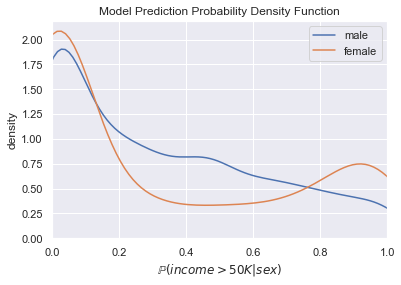

In [20]:
# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train_new.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predictNN(clf_nn, X_train1_new, y_train1_new, X_test_new, y_test_new)
y_pred = train_predictNN(clf_nn, X_train2_new, y_train2_new, X_test_new, y_test_new)
y_pred = train_predictNN(clf_nn, X_train_new, y_train_new, X_test_new, y_test_new)

display(results_df)

ax = sns.distplot(y_pred[z_test_new==1], hist=False, label='male')
ax = sns.distplot(y_pred[z_test_new==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
fig = ax.get_figure()
fig.savefig("figures/fair-data-dist.png")

,10148,20296,30444
Training time,24.397644,42.955252,64.935955
Prediction time,0.043839,0.045529,0.044428
F1 score (train),0.780545,0.783502,0.785911
Precision (train),0.825380,0.835098,0.822605
Recall (train),0.740330,0.737910,0.752352
Accuracy (train),0.870615,0.873276,0.872619
ROC AUC (train),0.938274,0.940473,0.942492
F1 score (test),0.670511,0.681667,0.672185
Precision (test),0.681742,0.701544,0.686971
Recall (test),0.659643,0.662885,0.658023


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


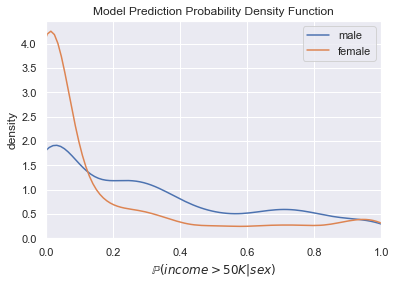

In [21]:
# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train_new.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predictNN(clf_nn, X_train1_new, y_train1_new, X_test, y_test)
y_pred = train_predictNN(clf_nn, X_train2_new, y_train2_new, X_test, y_test)
y_pred = train_predictNN(clf_nn, X_train_new, y_train_new, X_test, y_test)

display(results_df)

ax = sns.distplot(y_pred[z_test==1], hist=False, label='male')
ax = sns.distplot(y_pred[z_test==0], hist=False, label='female')
ax.set_xlim(0,1)
ax.set_title('Model Prediction Probability Density Function')
ax.set_ylabel('density')
ax.set_xlabel('$\mathbb{P}(income>50K | sex)$')
fig = ax.get_figure()
fig.savefig("figures/fair-algo-dist.png")